Nettoyage du DataSEt:
Convertion des unités de mesures


In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [147]:
df=pd.read_csv("datasetvoiture.csv")
df=df.reset_index(drop=True)
df



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [148]:
df["wheelbase"]= df["wheelbase"]*25.4

df["carlength"]= df["carlength"]*0.3048

df["carwidth"]= df["carwidth"]*0.0254

df["carheight"]= df["carheight"]*0.0254

df["curbweight"]= df["curbweight"]*0.453592

df["enginesize"]= df["enginesize"]*0.0163871

df["boreratio"]= df["boreratio"]*25.4

df["stroke"]= df["stroke"]*25.4

df["citympg"] = 235.2146 / df["citympg"]

df["highwaympg"]= 235.2146/df["highwaympg"]

df["price"]= df["price"]*0.90



df[["marque","modele"]] = df["CarName"].str.split(" ",1, expand=True)

df = df.drop("CarName", axis=1)
df = df.drop("car_ID", axis=1)


df.head(10)




/tmp/ipykernel_5159/1098221033.py:25: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["marque","modele"]] = df["CarName"].str.split(" ",1, expand=True)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,marque,modele
0,3,gas,std,two,convertible,rwd,front,2250.44,51.45024,1.62814,...,88.138,68.072,9.0,111,5000,11.200695,8.711652,12145.5000,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,2250.44,51.45024,1.62814,...,88.138,68.072,9.0,111,5000,11.200695,8.711652,14850.0000,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,2400.30,52.18176,1.66370,...,68.072,88.138,9.0,154,5000,12.379716,9.046715,14850.0000,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,2534.92,53.82768,1.68148,...,81.026,86.360,10.0,102,5500,9.800608,7.840487,12555.0000,audi,100ls
4,2,gas,std,four,sedan,4wd,front,2524.76,53.82768,1.68656,...,81.026,86.360,8.0,115,5500,13.067478,10.691573,15705.0000,audi,100ls
5,2,gas,std,two,sedan,fwd,front,2534.92,54.04104,1.68402,...,81.026,86.360,8.5,110,5500,12.379716,9.408584,13725.0000,audi,fox
6,1,gas,std,four,sedan,fwd,front,2687.32,58.73496,1.81356,...,81.026,86.360,8.5,110,5500,12.379716,9.408584,15939.0000,audi,100ls
7,1,gas,std,four,wagon,fwd,front,2687.32,58.73496,1.81356,...,81.026,86.360,8.5,110,5500,12.379716,9.408584,17028.0000,audi,5000
8,1,gas,turbo,four,sedan,fwd,front,2687.32,58.73496,1.81356,...,79.502,86.360,8.3,140,5500,13.836153,11.760730,21487.5000,audi,4000
9,0,gas,turbo,two,hatchback,4wd,front,2527.30,54.31536,1.72466,...,79.502,86.360,7.0,160,5500,14.700912,10.691573,16073.2503,audi,5000s


In [149]:

df.cov()

/tmp/ipykernel_5159/569982327.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.550789,-101.323102,-1.674644,-0.015805,-0.041817,-6.696655e+01,-0.089900,-1.114150,-0.086647,-0.883009,3.490100,162.520325,0.202585,-0.069608,-7.161022e+02
wheelbase,-101.323102,23394.651534,503.032713,6.626835,5.595566,2.804611e+04,59.424053,514.277369,196.100779,151.753866,2136.867380,-26298.514371,186.735702,163.719225,6.354399e+05
carlength,-1.674644,503.032713,14.140650,0.172343,0.114602,7.795273e+02,1.753578,15.688639,3.879890,2.366144,82.176198,-515.214693,6.383847,4.954343,1.846424e+04
carwidth,-0.015805,6.626835,0.172343,0.002969,0.000944,1.115768e+01,0.027346,0.209596,0.079400,0.039202,1.380579,-5.718137,0.095826,0.073448,2.974795e+02
carheight,-0.041817,5.595566,0.114602,0.000944,0.003852,4.332607e+00,0.002844,0.073043,-0.027342,0.064396,-0.267036,-9.485546,-0.000373,0.009870,5.325362e+01
curbweight,-66.966546,28046.109247,779.527278,11.157685,4.332607,5.577928e+04,137.088088,1053.623221,317.533018,141.992764,7011.452637,-29993.024233,481.689018,365.885597,1.418432e+06
enginesize,-0.089900,59.424053,1.753578,0.027346,0.002844,1.370881e+02,0.465674,2.740554,1.104123,0.078528,21.851654,-79.635898,1.309252,0.981798,4.288952e+03
boreratio,-1.114150,514.277369,15.688639,0.209596,0.073043,1.053623e+03,2.740554,47.326559,-3.063654,0.142019,156.063807,-836.673996,9.850813,7.030413,2.736154e+04
stroke,-0.086647,196.100779,3.879890,0.079400,-0.027342,3.175330e+02,1.104123,-3.063654,63.447026,5.888291,25.494634,-258.219060,0.872021,0.817050,4.549762e+03
compressionratio,-0.883009,151.753866,2.366144,0.039202,0.064396,1.419928e+02,0.078528,0.142019,5.888291,15.777104,-32.093730,-825.556683,-3.037881,-1.642990,1.941530e+03


In [150]:
df.describe()

profile= ProfileReport(df, title="profiling Report")

profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [151]:
df.to_csv('cleaned_data.csv')

In [152]:
# lst = [df["fueltype"], df["aspiration"], df["doornumber"], df["carbody"], df["drivewheel"], df["enginelocation"], df["enginetype"], df["cylindernumber"], df["fuelsystem"], df["marque"], df["modele"]]
# encoder = OneHotEncoder()
# lst_encoder = encoder.fit_transform(lst).toarray()
# lst_cols = [["fueltype_", "aspiration_", "doornumber_", "carbody_", "drivewheel_", "enginelocation_", "enginetype_", "cylindernumber_", "fuelsystem_", "marque_", "modele_" + str(i)] for i in range(lst_encoder.shape[1])]

# encoder_df = pd.DataFrame(lst_encoder, columns=lst_cols)

# x = pd.concat([df[["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]], encoder_df], axis=1)
# y = df["price"]


In [153]:



#
#lst= [df["fueltype"],df["aspiration"],df["doornumber"],df["carbody"],df["drivewheel"],df["enginelocation"],df["enginetype"],df["cylindernumber"],df["fuelsystem"],df["marque"],df["modele"]]
#encoder = OneHotEncoder()
#lst_encoder = encoder.fit_transform(lst).toarray()
#lst_cols = ["qualitativebinaire_" + str(i) for i in range(lst_encoder.shape[1])]
#encoder_df = pd.DataFrame(lst_encoder, columns=lst_cols)

#encoder_df.rename(columns={"qualitativebinaire_2148": "fueltypebinaire", "qualitativebinaire_2149": "aspirationbinaire","qualitativebinaire_2150":"doornumberbinaire","qualitativebinaire_2151":"carbodybinaire","qualitativebinaire_2152":"drivewheelbinaire","qualitativebinaire_2153":"enginelocationbinaire","qualitativebinaire_2154":"enginetypebinaire","qualitativebinaire_2155":"cylindrenumberbinaire","qualitativebinaire_2156":"fuelsystembinaire","qualitativebinaire_2157":"marquebinaire","qualitativebinaire_2158":"modelbinaire"}, inplace=True)



#x = pd.concat([df[["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]], encoder_df], axis=1)
#x=x.drop(["price"],axis=1)
#y = df["price"]

#x

In [154]:

# #encoder.fit_transform(lstencoder).toarray()

# y = df['price']
# x = df.drop('price', axis=1)


# X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


# #lstqualitative = ['fueltypebinaire','aspirationbinaire', 'doornumberbinaire', 'carbodybinaire', 'drivewheelbinaire', 'enginelocationbinaire', 'enginetypebinaire', 'fuelsystembinaire', 'marquebinaire', 'modelbinaire']
# #lstnumerique = ['symboling',"wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize","boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]

# lstnumerique = ['symboling', 'fueltype', 'aspiration', 'doornumber',  'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'marque', 'modele']

# lstqualitative = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
#         'enginesize', 'boreratio', 'stroke',
#        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'cylindernumber']
# #lstqualitative = [x['fueltypebinaire'],x['aspirationbinaire'], x['doornumberbinaire'], x['carbodybinaire'], x['drivewheelbinaire'], x['enginelocationbinaire'], x['enginetypebinaire'], x['fuelsystembinaire'], x['marquebinaire'], x['modelbinaire']]
# #lstnumerique = [x["symboling"], x["wheelbase"], x["carlength"], x["carwidth"], x["carheight"], x["curbweight"], x["enginesize"], x["boreratio"], x["stroke"], x["compressionratio"], x["horsepower"], x["peakrpm"], x["citympg"], x["highwaympg"]]


# categorical_transformer = Pipeline(
#     steps=[
#         ("encoder", OneHotEncoder(handle_unknown="ignore"))])
        

# numerique = Pipeline([
#         #('imputer', SimpleImputer(strategy='mean')),
#         #('min_max', MinMaxScaler()),
#         ('rbscaler' , RobustScaler())
#         ])



# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerique, lstnumerique),
#         ('enc', categorical_transformer, lstqualitative)
#     ]
# )
# model = Ridge()
# pipe = Pipeline([
#      ('prep', preprocessor),
#      ('model', model)
# ])

# print(X_train)

# # Entrainement sur X_train
# trained_pipe = pipe.fit(X_train,y_train)

# # prediction sur X_test
# trained_pipe.predict(X_test)

# # scoring sur X_test
# trained_pipe.score(X_test,y_test)

# # split data into training and testing sets
# #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # fit linear regression model to training data
# #model = LinearRegression()
# #model.fit(x_train, y_train)

# # evaluate model on testing data
# #score = model.score(x_test, y_test)
# #print(score)




In [155]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


categorial_features = ['symboling', 'cylindernumber', 'fueltype', 'aspiration', 'doornumber',  'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'marque', 'modele'   ]
#numeric_features = X.columns.drop(categorial_features)
numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']



numeric_transformer = Pipeline([
        #('imputer', SimpleImputer(strategy='mean')),
        #('min_max', MinMaxScaler()),
        ('rbscaler' , RobustScaler())
        ])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = Ridge()
pipe = Pipeline([
     ('prep', preprocessor),
     ('model', model)
])

# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
# trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)



0.8925932704925414

In [156]:
# optimisation
from sklearn.model_selection import GridSearchCV
parameters = {'model__alpha':[1, 10]}

# define the grid search
grid = GridSearchCV(pipe, parameters,cv=5)

#fit the grid search
grid.fit(X_train,y_train)

# best estimator
print(grid.best_score_)
print(grid.best_estimator_)
# best model
best_model = grid.best_estimator_
best_model.fit(X_train,y_train)


0.8999229437914913
Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rbscaler',
                                                                   RobustScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['symb

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('rbscaler',
                                                                   RobustScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['symboling',
                                                   'cylindernumber', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'marque', 'modele'])])),
                ('model', Ridge(alpha=1))])

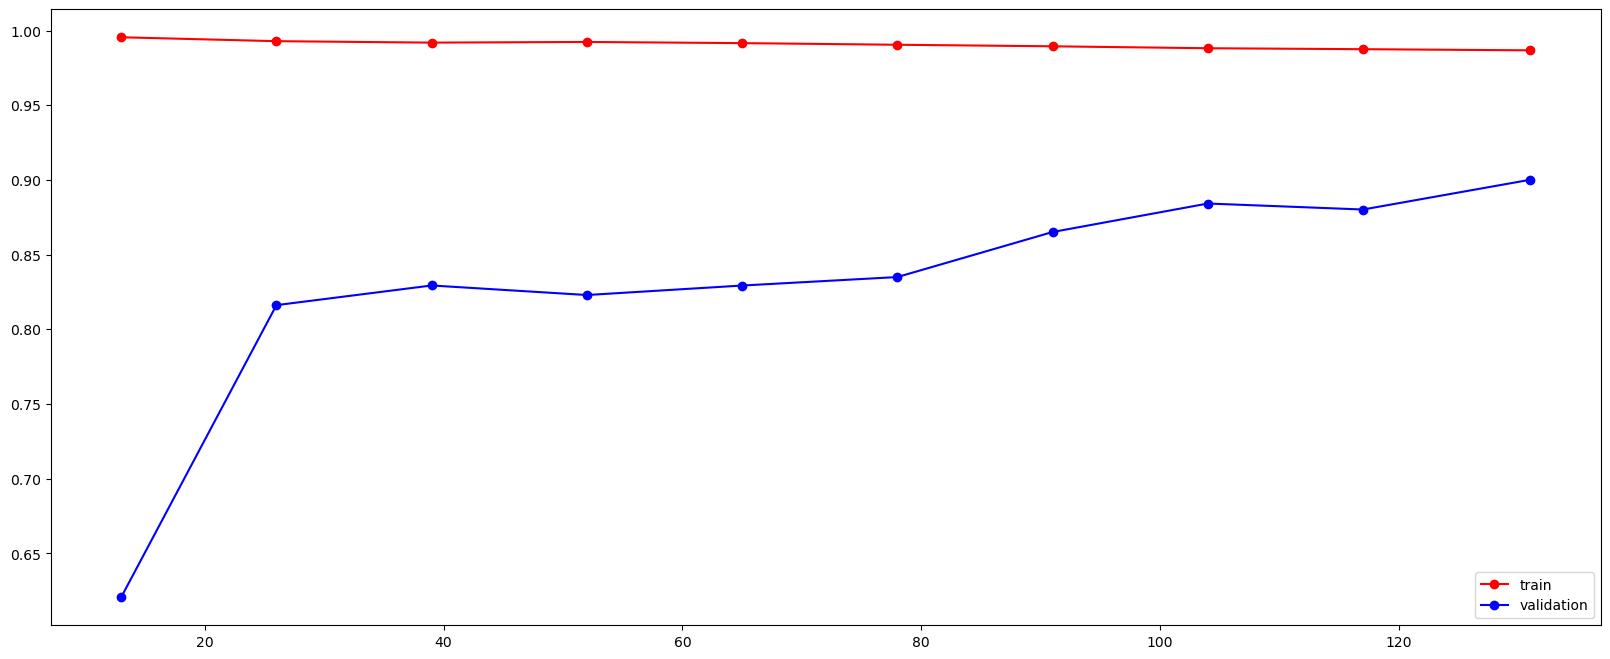

In [157]:
# visualisation 
from sklearn.model_selection import learning_curve
import numpy as np
N, train_score, val_score = learning_curve(best_model,
                                           X_train, 
                                           y_train, 
                                           train_sizes = np.linspace(0.1, 1.0, 10),
                                           cv = 5,
                                           n_jobs= 4)
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
plt.plot(N, train_score.mean(axis=1), 'o-', color="r", label = 'train')
plt.plot(N, val_score.mean(axis=1) , 'o-', color="b", label = 'validation')
plt.legend()
plt.show()

In [158]:
import pickle

with open("model.pkl",'wb') as file:
    pickle.dump(best_model,file)

